**Import Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
      

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Sentiment Analysis (Using Textblob)**

1) Clean Data

2) Find Sentiment Polarity

In [4]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import string

In [5]:
# Step 1: Data Preparation
df=pd.read_csv("cloths-rating.csv")
df

ProductID                UserID  Rating  \
0          777  AV1YnR7wglJLPUi8IJmi       4   
1          767  AVpfpK8KLJeJML43BCuD       4   
2         1080  AVqkIdntQMlgsOJE6fuB       5   
3         1077  AVpfpK8KLJeJML43BCuD       3   
4         1049  AVpfpK8KLJeJML43BCuD       5   
..         ...                   ...     ...   
629        823            B08GWV3SM6       1   
630        823            B08GWV3SM6       3   
631        847            B08GWV3SM6       5   
632        910  AVph0EeEilAPnD_x9myq       3   
633        333  AVqkIdntQMlgsOJE6fuB       5   

                                                  Text  
0                        Great taffy at a great price.  
1    Absolutely wonderful - silky and sexy and comf...  
2                   Love this dress! it's sooo pretty.  
3    I had such high hopes for this dress and reall...  
4    I love, love, love this jumpsuit. it's fun, fl...  
..                                                 ...  
629  I placed order 4+1 soaps.But I have received w...  
630  The soap is ok for bathing, no scent at all, m...  
631  For a long time I was searching for Indian soa...  
632                                 Good but not great  
633                    Quick,easy to make & tasty too.  

[634 rows x 4 columns]

In [6]:
df['Updated_Text']=df["Text"]
df

ProductID                UserID  Rating  \
0          777  AV1YnR7wglJLPUi8IJmi       4   
1          767  AVpfpK8KLJeJML43BCuD       4   
2         1080  AVqkIdntQMlgsOJE6fuB       5   
3         1077  AVpfpK8KLJeJML43BCuD       3   
4         1049  AVpfpK8KLJeJML43BCuD       5   
..         ...                   ...     ...   
629        823            B08GWV3SM6       1   
630        823            B08GWV3SM6       3   
631        847            B08GWV3SM6       5   
632        910  AVph0EeEilAPnD_x9myq       3   
633        333  AVqkIdntQMlgsOJE6fuB       5   

                                                  Text  \
0                        Great taffy at a great price.   
1    Absolutely wonderful - silky and sexy and comf...   
2                   Love this dress! it's sooo pretty.   
3    I had such high hopes for this dress and reall...   
4    I love, love, love this jumpsuit. it's fun, fl...   
..                                                 ...   
629  I placed order 4+1 soaps.But I have received w...   
630  The soap is ok for bathing, no scent at all, m...   
631  For a long time I was searching for Indian soa...   
632                                 Good but not great   
633                    Quick,easy to make & tasty too.   

                                          Updated_Text  
0                        Great taffy at a great price.  
1    Absolutely wonderful - silky and sexy and comf...  
2                   Love this dress! it's sooo pretty.  
3    I had such high hopes for this dress and reall...  
4    I love, love, love this jumpsuit. it's fun, fl...  
..                                                 ...  
629  I placed order 4+1 soaps.But I have received w...  
630  The soap is ok for bathing, no scent at all, m...  
631  For a long time I was searching for Indian soa...  
632                                 Good but not great  
633                    Quick,easy to make & tasty too.  

[634 rows x 5 columns]

In [7]:
def clean_data(s):
  token=word_tokenize(s)
  PUNCT_TO_REMOVE = string.punctuation
  remove_stopwords=[i for i in token if not i in (stopwords.words() and PUNCT_TO_REMOVE)]
  return (" ").join(remove_stopwords)


def sentiment(s):
    try:
        return TextBlob(str(s)).sentiment.polarity
    except:
        return 0

In [8]:
df['Updated_Text'] = df['Updated_Text'].apply(clean_data)
df

ProductID                UserID  Rating  \
0          777  AV1YnR7wglJLPUi8IJmi       4   
1          767  AVpfpK8KLJeJML43BCuD       4   
2         1080  AVqkIdntQMlgsOJE6fuB       5   
3         1077  AVpfpK8KLJeJML43BCuD       3   
4         1049  AVpfpK8KLJeJML43BCuD       5   
..         ...                   ...     ...   
629        823            B08GWV3SM6       1   
630        823            B08GWV3SM6       3   
631        847            B08GWV3SM6       5   
632        910  AVph0EeEilAPnD_x9myq       3   
633        333  AVqkIdntQMlgsOJE6fuB       5   

                                                  Text  \
0                        Great taffy at a great price.   
1    Absolutely wonderful - silky and sexy and comf...   
2                   Love this dress! it's sooo pretty.   
3    I had such high hopes for this dress and reall...   
4    I love, love, love this jumpsuit. it's fun, fl...   
..                                                 ...   
629  I placed order 4+1 soaps.But I have received w...   
630  The soap is ok for bathing, no scent at all, m...   
631  For a long time I was searching for Indian soa...   
632                                 Good but not great   
633                    Quick,easy to make & tasty too.   

                                          Updated_Text  
0                         Great taffy at a great price  
1    Absolutely wonderful silky and sexy and comfor...  
2                    Love this dress it 's sooo pretty  
3    I had such high hopes for this dress and reall...  
4    I love love love this jumpsuit it 's fun flirt...  
..                                                 ...  
629  I placed order 4+1 soaps.But I have received w...  
630  The soap is ok for bathing no scent at all mor...  
631  For a long time I was searching for Indian soa...  
632                                 Good but not great  
633                       Quick easy to make tasty too  

[634 rows x 5 columns]

In [9]:
df['Sentiment'] = df['Updated_Text'].apply(sentiment)
df

ProductID                UserID  Rating  \
0          777  AV1YnR7wglJLPUi8IJmi       4   
1          767  AVpfpK8KLJeJML43BCuD       4   
2         1080  AVqkIdntQMlgsOJE6fuB       5   
3         1077  AVpfpK8KLJeJML43BCuD       3   
4         1049  AVpfpK8KLJeJML43BCuD       5   
..         ...                   ...     ...   
629        823            B08GWV3SM6       1   
630        823            B08GWV3SM6       3   
631        847            B08GWV3SM6       5   
632        910  AVph0EeEilAPnD_x9myq       3   
633        333  AVqkIdntQMlgsOJE6fuB       5   

                                                  Text  \
0                        Great taffy at a great price.   
1    Absolutely wonderful - silky and sexy and comf...   
2                   Love this dress! it's sooo pretty.   
3    I had such high hopes for this dress and reall...   
4    I love, love, love this jumpsuit. it's fun, fl...   
..                                                 ...   
629  I placed order 4+1 soaps.But I have received w...   
630  The soap is ok for bathing, no scent at all, m...   
631  For a long time I was searching for Indian soa...   
632                                 Good but not great   
633                    Quick,easy to make & tasty too.   

                                          Updated_Text  Sentiment  
0                         Great taffy at a great price   0.800000  
1    Absolutely wonderful silky and sexy and comfor...   0.633333  
2                    Love this dress it 's sooo pretty   0.375000  
3    I had such high hopes for this dress and reall...   0.120000  
4    I love love love this jumpsuit it 's fun flirt...   0.500000  
..                                                 ...        ...  
629  I placed order 4+1 soaps.But I have received w...   0.000000  
630  The soap is ok for bathing no scent at all mor...   0.325000  
631  For a long time I was searching for Indian soa...  -0.025000  
632                                 Good but not great   0.150000  
633                       Quick easy to make tasty too   0.383333  

[634 rows x 6 columns]

In [10]:
def sentiment_binary(p):
    if(p<=0.6):
      return 0
    else:
        return 1

In [12]:
df['Sentiment'] = df['Sentiment'].apply(sentiment_binary)
df

ProductID                UserID  Rating  \
0          777  AV1YnR7wglJLPUi8IJmi       4   
1          767  AVpfpK8KLJeJML43BCuD       4   
2         1080  AVqkIdntQMlgsOJE6fuB       5   
3         1077  AVpfpK8KLJeJML43BCuD       3   
4         1049  AVpfpK8KLJeJML43BCuD       5   
..         ...                   ...     ...   
629        823            B08GWV3SM6       1   
630        823            B08GWV3SM6       3   
631        847            B08GWV3SM6       5   
632        910  AVph0EeEilAPnD_x9myq       3   
633        333  AVqkIdntQMlgsOJE6fuB       5   

                                                  Text  \
0                        Great taffy at a great price.   
1    Absolutely wonderful - silky and sexy and comf...   
2                   Love this dress! it's sooo pretty.   
3    I had such high hopes for this dress and reall...   
4    I love, love, love this jumpsuit. it's fun, fl...   
..                                                 ...   
629  I placed order 4+1 soaps.But I have received w...   
630  The soap is ok for bathing, no scent at all, m...   
631  For a long time I was searching for Indian soa...   
632                                 Good but not great   
633                    Quick,easy to make & tasty too.   

                                          Updated_Text  Sentiment  
0                         Great taffy at a great price          1  
1    Absolutely wonderful silky and sexy and comfor...          1  
2                    Love this dress it 's sooo pretty          0  
3    I had such high hopes for this dress and reall...          0  
4    I love love love this jumpsuit it 's fun flirt...          0  
..                                                 ...        ...  
629  I placed order 4+1 soaps.But I have received w...          0  
630  The soap is ok for bathing no scent at all mor...          0  
631  For a long time I was searching for Indian soa...          0  
632                                 Good but not great          0  
633                       Quick easy to make tasty too          0  

[634 rows x 6 columns]

**Sentence Embedding  (Transformer based model for word embedding)**

In [13]:
!pip install -U sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 138.9 MB/s eta 0:00:00


In [14]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [15]:
df['embeddings'] = df['Updated_Text'].apply(model.encode)
df

ProductID                UserID  Rating  \
0          777  AV1YnR7wglJLPUi8IJmi       4   
1          767  AVpfpK8KLJeJML43BCuD       4   
2         1080  AVqkIdntQMlgsOJE6fuB       5   
3         1077  AVpfpK8KLJeJML43BCuD       3   
4         1049  AVpfpK8KLJeJML43BCuD       5   
..         ...                   ...     ...   
629        823            B08GWV3SM6       1   
630        823            B08GWV3SM6       3   
631        847            B08GWV3SM6       5   
632        910  AVph0EeEilAPnD_x9myq       3   
633        333  AVqkIdntQMlgsOJE6fuB       5   

                                                  Text  \
0                        Great taffy at a great price.   
1    Absolutely wonderful - silky and sexy and comf...   
2                   Love this dress! it's sooo pretty.   
3    I had such high hopes for this dress and reall...   
4    I love, love, love this jumpsuit. it's fun, fl...   
..                                                 ...   
629  I placed order 4+1 soaps.But I have received w...   
630  The soap is ok for bathing, no scent at all, m...   
631  For a long time I was searching for Indian soa...   
632                                 Good but not great   
633                    Quick,easy to make & tasty too.   

                                          Updated_Text  Sentiment  \
0                         Great taffy at a great price          1   
1    Absolutely wonderful silky and sexy and comfor...          1   
2                    Love this dress it 's sooo pretty          0   
3    I had such high hopes for this dress and reall...          0   
4    I love love love this jumpsuit it 's fun flirt...          0   
..                                                 ...        ...   
629  I placed order 4+1 soaps.But I have received w...          0   
630  The soap is ok for bathing no scent at all mor...          0   
631  For a long time I was searching for Indian soa...          0   
632                                 Good but not great          0   
633                       Quick easy to make tasty too          0   

                                            embeddings  
0    [-0.045943342, 0.051150925, 0.055511825, -0.01...  
1    [-0.121030584, 0.015761435, 0.03227772, -0.045...  
2    [-0.07385817, 0.0899186, 0.019577794, 0.001435...  
3    [-0.08996887, 0.05298794, 0.08222887, 0.021171...  
4    [-0.14128998, 0.079663426, 0.06691489, -0.0500...  
..                                                 ...  
629  [0.020377798, -0.019266013, 0.010852055, -0.05...  
630  [-0.02408376, -0.038170673, 0.10297513, -0.105...  
631  [0.039832678, -0.037876263, -0.051443122, -0.0...  
632  [-0.007950477, -0.0017184165, -0.08061785, -0....  
633  [-0.017042512, -0.035685435, 0.053558603, 0.09...  

[634 rows x 7 columns]

In [16]:
X = df['embeddings'].to_list()  # Input text samples
y = df['Sentiment'].to_list()  # Sentiment labels


# Step 2: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
X

[array([-4.59433421e-02,  5.11509255e-02,  5.55118248e-02, -1.36642950e-02,
        -1.10341839e-01, -4.93270205e-03,  9.11071151e-02,  4.49979901e-02,
         5.23623421e-05, -4.87877950e-02,  4.93201166e-02,  7.88390450e-03,
         6.73037313e-04, -9.13282484e-02, -1.52911153e-02, -5.01126051e-02,
         1.50334001e-01, -6.61625043e-02,  2.31456701e-02, -1.05762787e-01,
        -8.78851116e-02, -3.74691971e-02,  6.73033297e-02,  3.09199449e-02,
        -4.56880480e-02,  1.72575936e-02, -2.18455866e-02, -2.35976558e-03,
         4.47590798e-02, -7.10696578e-02, -9.41814035e-02,  3.95255350e-03,
        -6.59659579e-02, -6.27105683e-02,  3.04471254e-02, -6.73872360e-04,
         6.65894672e-02, -3.13970596e-02,  9.20733586e-02, -1.39782783e-02,
         6.54262071e-03, -4.19186167e-02, -5.33562116e-02, -5.94410971e-02,
        -6.06539473e-02, -4.38242964e-02,  5.48353456e-02, -2.04819907e-02,
         4.17644233e-02,  3.34603451e-02,  2.15769112e-02, -2.68987752e-02,
         4.3

**1) Classical Machine learning models such as  SVM, Random Forest, Decision tree**

In [18]:
# SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)



DecisionTreeClassifier()

In [19]:
# Step 3: Model Evaluation
# SVM
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

# Decision Tree
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)

# Print the evaluation results
print("SVM Accuracy:", svm_accuracy)
print("SVM Report:\n", svm_report)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Report:\n", rf_report)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Report:\n", dt_report)


SVM Accuracy: 0.8031496062992126
SVM Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88        99
           1       0.58      0.39      0.47        28

    accuracy                           0.80       127
   macro avg       0.71      0.66      0.67       127
weighted avg       0.78      0.80      0.79       127

Random Forest Accuracy: 0.8031496062992126
Random Forest Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89        99
           1       0.71      0.18      0.29        28

    accuracy                           0.80       127
   macro avg       0.76      0.58      0.59       127
weighted avg       0.79      0.80      0.75       127

Decision Tree Accuracy: 0.6929133858267716
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.32      0.36      0.34        28

    

**BILSTM**


A Bidirectional LSTM, or biLSTM, is a sequence processing model that consists of two LSTMs: one taking the input in a forward direction, and the other in a backwards direction. BiLSTMs effectively increase the amount of information available to the network, improving the context available to the algorithm (e.g. knowing what words immediately follow and precede a word in a sentence).


In [ ]:
import numpy as np

In [ ]:
df

ProductID                UserID  Rating  \
0          777  AV1YnR7wglJLPUi8IJmi       4   
1          767  AVpfpK8KLJeJML43BCuD       4   
2         1080  AVqkIdntQMlgsOJE6fuB       5   
3         1077  AVpfpK8KLJeJML43BCuD       3   
4         1049  AVpfpK8KLJeJML43BCuD       5   
..         ...                   ...     ...   
629        823            B08GWV3SM6       1   
630        823            B08GWV3SM6       3   
631        847            B08GWV3SM6       5   
632        910  AVph0EeEilAPnD_x9myq       3   
633        333  AVqkIdntQMlgsOJE6fuB       5   

                                                  Text  \
0                        Great taffy at a great price.   
1    Absolutely wonderful - silky and sexy and comf...   
2                   Love this dress! it's sooo pretty.   
3    I had such high hopes for this dress and reall...   
4    I love, love, love this jumpsuit. it's fun, fl...   
..                                                 ...   
629  I placed order 4+1 soaps.But I have received w...   
630  The soap is ok for bathing, no scent at all, m...   
631  For a long time I was searching for Indian soa...   
632                                 Good but not great   
633                    Quick,easy to make & tasty too.   

                                          Updated_Text  Sentiment  \
0                         Great taffy at a great price          1   
1    Absolutely wonderful silky and sexy and comfor...          1   
2                    Love this dress it 's sooo pretty          0   
3    I had such high hopes for this dress and reall...          0   
4    I love love love this jumpsuit it 's fun flirt...          0   
..                                                 ...        ...   
629  I placed order 4+1 soaps.But I have received w...          0   
630  The soap is ok for bathing no scent at all mor...          0   
631  For a long time I was searching for Indian soa...          0   
632                                 Good but not great          0   
633                       Quick easy to make tasty too          0   

                                            embeddings  
0    [-0.04594337, 0.05115091, 0.055511866, -0.0136...  
1    [-0.121030584, 0.015761415, 0.03227769, -0.045...  
2    [-0.07385819, 0.08991859, 0.019577794, 0.00143...  
3    [-0.08996888, 0.052987944, 0.08222883, 0.02117...  
4    [-0.14128998, 0.079663455, 0.06691489, -0.0500...  
..                                                 ...  
629  [0.020377792, -0.019266041, 0.01085206, -0.057...  
630  [-0.024083754, -0.038170666, 0.10297516, -0.10...  
631  [0.03983264, -0.037876222, -0.051443122, -0.00...  
632  [-0.0079504745, -0.0017184168, -0.080617845, -...  
633  [-0.017042534, -0.035685398, 0.053558588, 0.09...  

[634 rows x 7 columns]

In [ ]:
X_data, y_data = np.array(df['Updated_Text']), np.array(df['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.05, random_state = 0)
print('Data Split done.')

Data Split done.


## <a id="6">Creating Word Embeddings using Word2Vec model</a>

**Word embedding** is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc. Loosely speaking, word embeddings are **vector representations** of a particular word.

**Word2Vec** was developed by Google and is one of the most popular technique to learn word embeddings using shallow neural network.
Word2Vec can create word embeddings using two methods (both involving Neural Networks): **Skip Gram** and **Common Bag Of Words (CBOW)**.



In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 300


In [ ]:
# Defining the model input length.
input_length = 60

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## <a id="7">Tokenizing and Padding datasets</a>

**Tokenization** is a common task in **Natural Language Processing (NLP)**. It’s a fundamental step in both traditional NLP methods like **Count Vectorizer** and Advanced Deep Learning-based architectures like **Transformers**.

**Tokenization** is a way of separating a piece of text into smaller units called **tokens**. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our model e.g. LSTM, not all the sentences have the same length. We need to have the inputs with the same size, this is where the **padding** is necessary.

**Padding** is the process by which we can add padding tokens at the start or end of a sentence to increase it's length upto the required size. If required, we can also drop some words to reduce to the specified length.


* **Tokenizer:** Tokenizes the dataset into a list of tokens.
* **pad_sequences:** Pads the tokenized data to a certain length.

The **input_length** has been set to 60. This will be the length after the data is tokenized and padded.

In [ ]:
vocab_length = 2000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 2000


In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (602, 60)
X_test.shape : (32, 60)


Defining the **Tokenizer** and fitting it on the training data. Here, we are tokenzing the data by spliting it up with the **delimiter space ' '**.

**Args in Tokenizer():**
1. **filters:** Characters to filter out from the sentences to tokenize.
2. **lower:** True/False. Whether to lowerCase the sentence or not.
3. **oov_token:** Out of Vocabulary token to put in for words which aren't in the tokenizer vocab.

Filters and lower has been turned off because we've already done those steps during the preprocessing step.

In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (2000, 100)


In [ ]:
from keras.layers import Embedding
from keras.models import Sequential                                    
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense 
from keras.layers.convolutional import Conv1D    
from keras.layers import GlobalMaxPool1D


### Model Architecture

1) **Embedding Layer:** Layer responsible for converting the tokens into their vector representation that is generated by Word2Vec model. We're using the predefined layer from Tensorflow in out model.

**Arguments -**
* **input_dim**: Size of the vocabulary.
* **output_dim**: Dimension of the dense embedding.
* **weights**: Initiazises the embedding matrix.
* **trainable**: Specifies whether the layer is trainable or not.

2) **Bidirectional:** Bidirectional wrapper for RNNs. It means the context are carried from both left to right and right to left in the wrapped RNN layer.

3) **LSTM:** **Long Short Term Memory**, its a variant of **RNN** which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN. 

**Arguments -**
* **units:** Positive integer, dimensionality of the output space.
* **dropout:**  Fraction of the units to drop for the linear transformation of the inputs.
* **return_sequence:** Whether to return the last output in the output sequence, or the full sequence.

4) **Conv1D:** This layer creates a convolution kernel that is convolved with the layer input over a single dimension to produce a tensor of outputs.

**Arguments -**
* **filters:** The dimensionality of the output space (i.e. the number of output filters in the convolution).
* **kernel_size:** Specifies the length of the 1D convolution window.
* **activation:** Specifies the activation function to use. 

5) **GlobalMaxPool1D:** Downsamples the input representation by taking the maximum value over the different dimensions.


6) **Dense:** Dense layer adds a fully connected layer in the model. The argument passed specifies the number of nodes in that layer.

The last dense layer has the activation **"Sigmoid"**, which is used to transform the input to a number between 0 and 1. Sigmoid activations are generally used when we have 2 categories to output in.

In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 100)           200000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 60, 200)          160800    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 60, 200)          240800    
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
1/1 [==============================] - 22s 22s/step - loss: 0.6876 - accuracy: 0.7449 - val_loss: 0.6329 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 2/12
1/1 [==============================] - 3s 3s/step - loss: 0.6162 - accuracy: 0.7893 - val_loss: 0.5856 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 3/12
1/1 [==============================] - 5s 5s/step - loss: 0.5591 - accuracy: 0.7893 - val_loss: 0.5595 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 4/12
1/1 [==============================] - 4s 4s/step - loss: 0.5243 - accuracy: 0.7893 - val_loss: 0.5889 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 5/12
1/1 [==============================] - 5s 5s/step - loss: 0.5470 - accuracy: 0.7893 - val_loss: 0.5987 - val_accuracy: 0.7049 - lr: 0.0010
Epoch 6/12
1/1 [==============================] - 6s 6s/step - loss: 0.5514 - accuracy: 0.7893 - val_loss: 0.5822 - val_accuracy: 0.7049 - lr: 0.0010


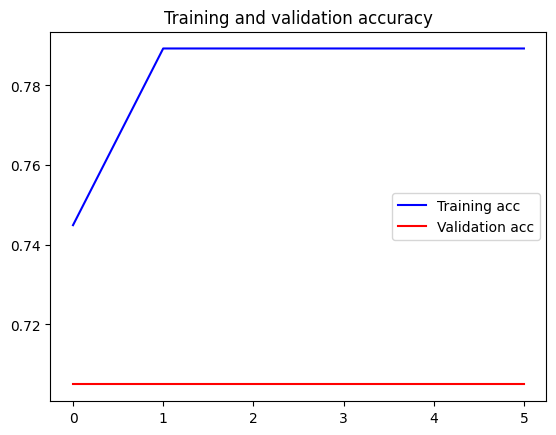

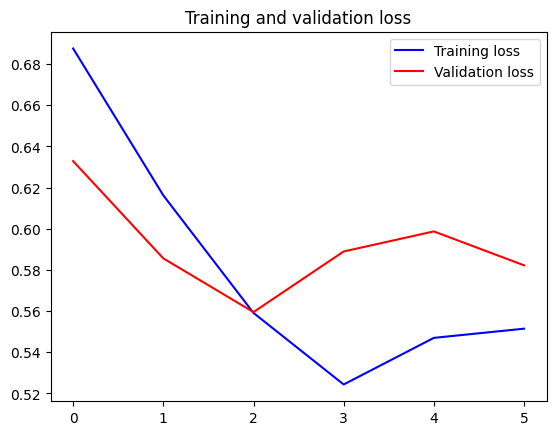

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

1/1 [==============================] - 6s 6s/step


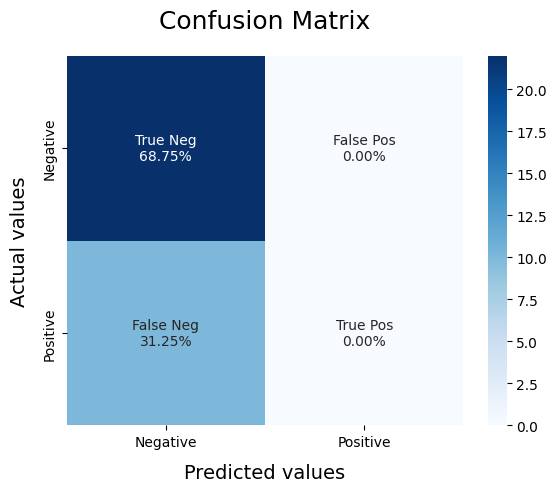

In [ ]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [ ]:
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        22
           1       0.00      0.00      0.00        10

    accuracy                           0.69        32
   macro avg       0.34      0.50      0.41        32
weighted avg       0.47      0.69      0.56        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
bilstm_accuracy = accuracy_score(y_test, y_pred)
print(bilstm_accuracy)

0.6875


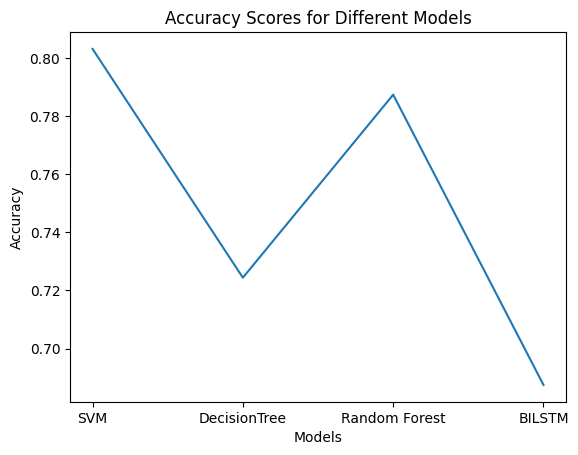

In [ ]:
import matplotlib.pyplot as plt

model_names = ['SVM',  'DecisionTree','Random Forest','BILSTM']
accuracy_scores = [svm_accuracy,dt_accuracy,rf_accuracy,bilstm_accuracy]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.plot(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

**BERT-based word Embedding**

NLP models such as LSTMs or CNNs require inputs in the form of numerical vectors, and this typically means translating features like the vocabulary and parts of speech into numerical representations. In the past, words have been represented either as uniquely indexed values (one-hot encoding), or more helpfully as neural word embeddings where vocabulary words are matched against the fixed-length feature embeddings that result from models like Word2Vec or Fasttext. BERT offers an advantage over models like Word2Vec, because while each word has a fixed representation under Word2Vec regardless of the context within which the word appears, BERT produces word representations that are dynamically informed by the words around them. 

In [29]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt


# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [22]:
token_var = ""
def token_text(text):
  marked_text = "[CLS] " + text + " [SEP]"

  # Tokenize our sentence with the BERT tokenizer.
  tokenized_text = tokenizer.tokenize(marked_text)

  # Print out the tokens.
 # print (tokenized_text)

  # Display the words with their indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  for tup in zip(tokenized_text, indexed_tokens):
      print('{:<12} {:>6,}'.format(tup[0], tup[1])) 
  segments_ids = [1] * len(tokenized_text)

  print (segments_ids)

  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])
  # Load pre-trained model (weights)
  model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
  model.eval()
  with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

  

In [23]:
token_text(df['Updated_Text'][0])

[CLS]           101
great         2,307
ta           11,937
##ffy        16,329
at            2,012
a             1,037
great         2,307
price         3,976
[SEP]           102
[1, 1, 1, 1, 1, 1, 1, 1, 1]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load and preprocess the dataset
dataset = ...  # Load your financial_news dataset here
sentences = df['Updated_Text'].tolist()
sentiment_labels = df['Sentiment'].tolist()

# Define the parameters
max_seq_length = 100  # Maximum sequence length
num_classes = 3  # Number of sentiment classes (positive, negative, neutral)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the sentences
input_ids = []
attention_masks = []

for sentence in sentences:
    encoded_dict = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=max_seq_length,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)
sentiment_labels = tf.one_hot(sentiment_labels, depth=num_classes)

# Split the dataset into training and testing sets
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(input_ids) * split_ratio)

train_input_ids = input_ids[:split_index]
train_attention_masks = attention_masks[:split_index]
train_labels = sentiment_labels[:split_index]
test_input_ids = input_ids[split_index:]
test_attention_masks = attention_masks[split_index:]
test_labels = sentiment_labels[split_index:]

# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Freeze the BERT layers
bert_model.trainable = False

# Define the model architecture
input_ids_layer = Input(shape=(max_seq_length,), dtype=tf.int32)
attention_masks_layer = Input(shape=(max_seq_length,), dtype=tf.int32)
bert_output = bert_model(input_ids_layer, attention_mask=attention_masks_layer)[0]
pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(bert_output)
output_layer = Dense(units=num_classes, activation='softmax')(pooling_layer)

model = Model(inputs=[input_ids_layer, attention_masks_layer], outputs=output_layer)
model.summary()

# Compile and train the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    [train_input_ids, train_attention_masks],
    train_labels,
    epochs=3,
    batch_size=32,
    validation_data=([test_input_ids, test_attention_masks], test_labels)
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were init

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                         

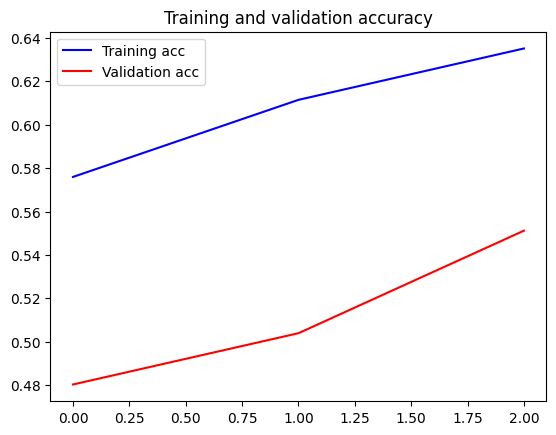

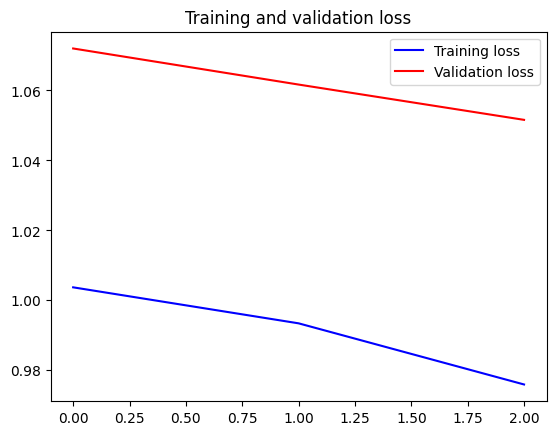

In [25]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()